# Iris Dataset Analysis

## Prepare the dataset

Use `numpy` or to load `data/iris.data`. Remember to look at the file contents to understand the data format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create a map that returns the attribute name given the attribute index.

- 0 -> sepal length
- 1 -> sepal width
- 2 -> petal length
- 3 -> petal width

In [2]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip

--2025-06-20 07:22:13--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip.11’

iris.zip.11             [ <=>                ]   3.65K  --.-KB/s    in 0s      

2025-06-20 07:22:15 (66.5 MB/s) - ‘iris.zip.11’ saved [3738]



In [3]:
!unzip -o iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [4]:
data = np.genfromtxt('iris.data', delimiter=',', dtype=[('f1', float), ('f2', float), ('f3', float), ('f4', float), ('label', 'U20')], encoding='utf-8')
print(data)


[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') (4.9, 3. , 1.4, 0.2, 'Iris-setosa')
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa') (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
 (5. , 3.6, 1.4, 0.2, 'Iris-setosa') (5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
 (4.6, 3.4, 1.4, 0.3, 'Iris-setosa') (5. , 3.4, 1.5, 0.2, 'Iris-setosa')
 (4.4, 2.9, 1.4, 0.2, 'Iris-setosa') (4.9, 3.1, 1.5, 0.1, 'Iris-setosa')
 (5.4, 3.7, 1.5, 0.2, 'Iris-setosa') (4.8, 3.4, 1.6, 0.2, 'Iris-setosa')
 (4.8, 3. , 1.4, 0.1, 'Iris-setosa') (4.3, 3. , 1.1, 0.1, 'Iris-setosa')
 (5.8, 4. , 1.2, 0.2, 'Iris-setosa') (5.7, 4.4, 1.5, 0.4, 'Iris-setosa')
 (5.4, 3.9, 1.3, 0.4, 'Iris-setosa') (5.1, 3.5, 1.4, 0.3, 'Iris-setosa')
 (5.7, 3.8, 1.7, 0.3, 'Iris-setosa') (5.1, 3.8, 1.5, 0.3, 'Iris-setosa')
 (5.4, 3.4, 1.7, 0.2, 'Iris-setosa') (5.1, 3.7, 1.5, 0.4, 'Iris-setosa')
 (4.6, 3.6, 1. , 0.2, 'Iris-setosa') (5.1, 3.3, 1.7, 0.5, 'Iris-setosa')
 (4.8, 3.4, 1.9, 0.2, 'Iris-setosa') (5. , 3. , 1.6, 0.2, 'Iris-setosa')
 (5. , 3.4, 1.6, 0.4, 'Iris-setosa') (5.2, 3.5, 1.5

In [5]:
features = np.column_stack((data['f1'], data['f2'], data['f3'], data['f4']))
labels = data['label']

In [6]:
attribute_map = {
    0: "sepal length",
    1: "sepal width",
    2: "petal length",
    3: "petal width"
}

## Data analysis

Write a function that prints the mean and another that prints the standard deviation of each attribute.

In [7]:
def print_means(features):
    print("Attribute Means:")
    for i in range(features.shape[1]):
        mean = np.mean(features[:, i])
        print(f' Attribute {i}: Mean = {mean:.2f}')

In [8]:
def print_stddevs(feature):
    print("Attribute Standard Deviations:")
    for i in range(feature.shape[1]):
        std = np.std(feature[:, i])
        print(f" Attribute {i}: Std Dev = {std:.2f}")

In [9]:
print_means(features)
print_stddevs(features)

Attribute Means:
 Attribute 0: Mean = 5.84
 Attribute 1: Mean = 3.05
 Attribute 2: Mean = 3.76
 Attribute 3: Mean = 1.20
Attribute Standard Deviations:
 Attribute 0: Std Dev = 0.83
 Attribute 1: Std Dev = 0.43
 Attribute 2: Std Dev = 1.76
 Attribute 3: Std Dev = 0.76


Use the functions you defined above to print the mean of the attributes for each class.

Now, let's plot this data. Use `matplotlib` to create scatter plots for petal and sepal. Use different colors for each class.

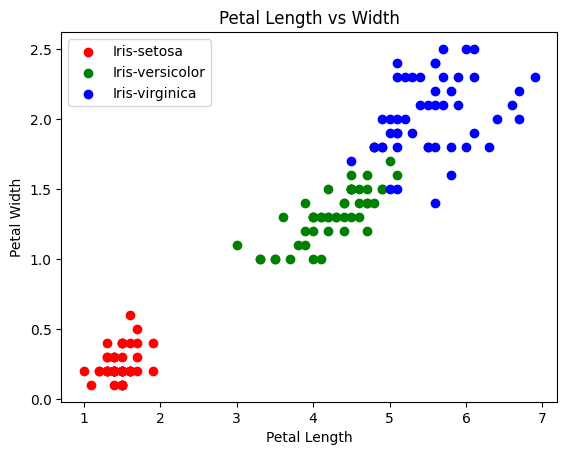

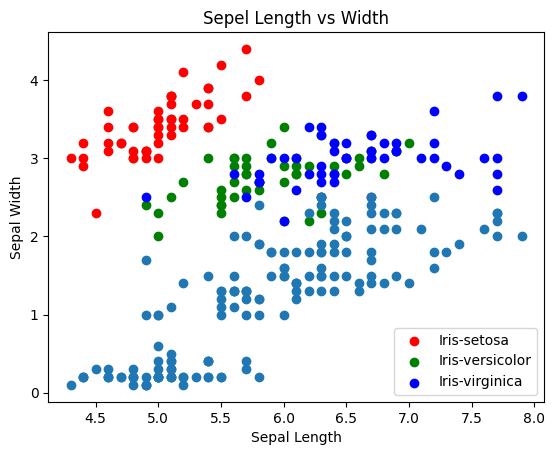

In [21]:
classes = np.unique(labels)
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

for cls in classes:
    subset = features[labels == cls]
    plt.scatter(subset[:, 2], subset[:, 3], c=colors[cls], label=cls)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.legend()
plt.show()

for cls in classes:
    subset = features[labels == cls]
    plt.scatter(subset[:, 0], subset[:, 1], c=colors[cls], label=cls)

plt.scatter(features[:, 0], features[:, 3])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepel Length vs Width')
plt.legend()
plt.show()